# Nonlinear time-dependent PDEs in FEniCS

We can consider the **time-dependent heat equation** with a forcing term $f(u)$ that is **nonlinear** in the unknown $u$. The equations read as follows:

$$
\frac{\partial u}{\partial t} + u_{xx} = f(u)  \qquad \text{ for } x \in \Omega \text{ and for } t \in [0, T], \\
u = g  \qquad \text{ for } x \in \partial \Omega \text{ and } t \in [0, T], \\
u = u^0 \qquad \text{ for } x \in \Omega \text{ and } t = 0.
$$


$\Omega$ denotes the spatial domain and $\partial \Omega$ the domain boundary. For example for $\Omega = [-L, L]$, the boundary $\partial \Omega$ consists of the two points $-L$ and $L$. We start the simulation at time $t=0$ until the final time $T$.

The solution $u = u(x, t)$, the right-hand side $f = f (u(x, t))$ can be any nonlinear expression function of $u,$ and the boundary value $g = g(x, t)$ may vary in space $(x)$ and time (t). The initial value $u_0$ is a function of space only.


# Newton's method can be used to linearize and solve the equation

At each time step we have the semidiscretized equation to solve:

$$F(x) = u^n − \Delta t u^n_{xx} - u^{n-1} - \Delta t f^n = 0,$$
for $n=1,\dots, N.$

Since $f(u)$ is a non linear expression of $u$ we need to define a method to linearize the equation. For example, we can use the **Newton's method**.

In [1]:
from IPython.display import HTML
HTML('<a title="By Ralf Pfeifer (de:Image:NewtonIteration Ani.gif) [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC-BY-SA-3.0 (http://creativecommons.org/licenses/by-sa/3.0/)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ANewtonIteration_Ani.gif"><img width="512" alt="NewtonIteration Ani" src="https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif"/></a>')

## Some implementation tips

If you use FEniCS you do not need to implement a Newton's scheme since it is already implemented!

Anyway, there are few differences compared to the linear case in the syntax.

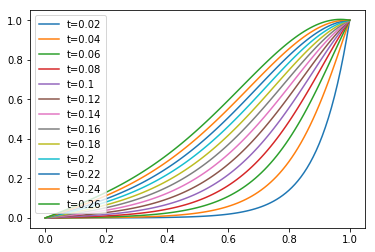

In [2]:
%matplotlib inline
from fenics import *
import pylab
#parameters['plotting_backend'] = 'matplotlib'

def f(u):
    return u*u

mesh = UnitIntervalMesh(100)
V = FunctionSpace(mesh, "CG", 1)
u = Function(V)
u0 = Function(V)
v = TestFunction(V)
bc = [DirichletBC(V, 0.0, "x[0]==0.0 && on_boundary"),
      DirichletBC(V, 1.0, "x[0]==1.0 && on_boundary")]

D = Constant(0.1)
dt = 0.1
a = u/dt*v*dx + D*inner(grad(u), grad(v))*dx
L = u0/dt*v*dx + f(u)*v*dx

F = a-L

t = 0
T = 0.25
dt = 0.02
n_timesteps = 0
while t<=T:
    t +=dt
    n_timesteps += 1
    solve(F==0, u, bc)
    u0.assign(u)
        
    if n_timesteps % 1 == 0:
        plot(u, label="t={}".format(t))
        
pylab.legend()

In this case, we do not define a Trial Function but only a Function. Both the left and the right hand side change at every timestep. Therefore, it is not possible to assemble the matrix before the time loop unlike the linear case. In addition, the form needs to be written such that everything is on the left hand side (F==0) 

## FEniCS challenge 
Solve the cubic, bistable cable equation on an interval $\Omega=[-L, L]$ in FEniCS 
$$
\frac{\partial u}{\partial t} = \sigma u_{xx} + f(u) \quad \text{ for } -L < x < L, \\
u_x = 0 \quad \text{ for } x = -L \text{ and } x = L,
$$
with 
* $f(u) = Au(1-u)(u-\alpha)$,
* $\alpha = 0.1$,
* $A = 1.0$.
* $\sigma = 1.0$,
* $L = 100$.

Implement an implicit Euler time-stepping scheme and solve the problem from $t=0$ to $T=250$ with a timestep of $dt=2.5$. Use as initial condition

$$
\frac{1}{2} (\text{exp} (-x^2) - \text{exp} (-(x-L)^2)
$$

Note that the initial conditions look like two bumps - one positive at $x=0$, one negative at $x=L$. What do you think will happen to them as $t$ increases?

In order to visualize your solution, it is easiest to first compute it at all time points, then make a plot with a slider you can drag to set the time. You may find the below code snipped helpful.

In [4]:
%matplotlib inline
from ipywidgets import interact, IntSlider

solutions = [] # list holding all the solutions

### replace stuff below this with code which computes the solution and stores the solution at time n in solutions[n]
V = FunctionSpace(UnitIntervalMesh(10), "CG", 2)
for n in range(10):
    sol_n = interpolate(Expression("n*x[0]", n=n, degree=1), V)
    t = n * 0.1
    solutions.append((t, sol_n.copy())) # copy is needed if you will later modify sol_n
## replace stuff above this

### the below then gives you a movable slider which you can drag around  to see the solution at different times

def plot_solution(n):
    t, U = solutions[n]
    p = plot(U, title="potential (t = {})".format(t))
    p[0].axes.set_ylim([0, 10])

slider = IntSlider(min=0, max=len(solutions)-1, continuous_update=False)
slider.layout.width = "80%"

interact(plot_solution,n=slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description=u'n', layout=Layout(width=u'80%'), max=9), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_solution>